In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path

from hloc import extract_features, match_features, reconstruction, visualization, pairs_from_retrieval,pairs_from_exhaustive

In [2]:
import os
pmuc = '/src/matcher_engine/HierarchicalLocalization/PMUC_Dataset'
for map_name in os.listdir(pmuc):
    print(map_name)
    flag = False
    for i in ["bld3", "bld4" , "canteen", "dragon" , "essence", "cuparking", "football", "political", "isl2-20221101", "shellhut"]:
        if i in map_name: 
            flag = True
    # if "isl" not in map_name: continue
    if flag:
        images = Path(pmuc) / map_name/ 'db'
        outputs = Path(f'pairs_loc_outputs/{map_name}/')
        # if os.path.exists(outputs): 
        #     print("skipping", outputs)
        #     continue
        sfm_pairs = outputs / 'pairs-netvlad-custom2.txt'
        sfm_dir = outputs / 'sfm_superpoint+superglue'
        feature_path = outputs / 'feats-superpoint-n4096-r1024.h5'
        retrieval_path = outputs / 'openibl_4096.h5'
        match_path = outputs / "feats-superpoint-n4096-r1024_matches-superglue_pairs-custom_retrieved.h5"
        retrieval_conf = extract_features.confs['netvlad']
        feature_conf = extract_features.confs['superpoint_aachen']
        matcher_conf = match_features.confs['superglue']

        retrieval_path = extract_features.main(retrieval_conf, images, outputs)
        if "isl" in map_name: num_match = 48
        else:num_match = 50
        pairs_from_retrieval.main(retrieval_path, sfm_pairs, num_matched=num_match)

[2023/02/15 08:55:14.369Z hloc INFO] Extracting local features with configuration:
{'model': {'name': 'netvlad'},
 'output': 'global-feats-netvlad',
 'preprocessing': {'resize_max': 1024}}
[2023/02/15 08:55:14.380Z hloc INFO] Found 264 images in root /src/matcher_engine/HierarchicalLocalization/PMUC_Dataset/essence-20221103/db.
[2023/02/15 08:55:14.382Z hloc INFO] Start delete query feature: pairs_loc_outputs/essence-20221103/global-feats-netvlad.h5
[2023/02/15 08:55:14.394Z hloc INFO] Start skip pairs: pairs_loc_outputs/essence-20221103/global-feats-netvlad.h5


Files Indexing.xlsx
essence-20221103


[2023/02/15 08:55:21.939Z hloc INFO] use custom weight for netvlad...
[2023/02/15 08:55:21.941Z hloc INFO] Finished setup model for feature extraction
 25%|██▍       | 65/264 [00:04<00:14, 14.19it/s]


KeyboardInterrupt: 

In [3]:
import shutil
from pathlib import Path
import os
for i in os.scandir("/src/matcher_engine/HierarchicalLocalization/pairs_loc_outputs"):
    if "state_dict" in i.name or "checkpoint" in i.name : continue
    os.makedirs(Path("/src/matcher_engine/HierarchicalLocalization/PMUC_globalDesc") / i.name / "weight2", exist_ok=True)
    shutil.copy(Path(i.path) / 'netvlad_weight2.pt', Path("/src/matcher_engine/HierarchicalLocalization/PMUC_globalDesc") / i.name / "weight2")

FileNotFoundError: [Errno 2] No such file or directory: '/src/matcher_engine/HierarchicalLocalization/pairs_loc_outputs/canteen-20221115/netvlad_weight2.pt'

In [12]:
import shutil
from pathlib import Path
for i in os.scandir("/src/matcher_engine/HierarchicalLocalization/pairs_loc_outputs"):
    if "state_dict" in i.name or "checkpoint" in i.name : continue
    os.remove(Path(i.path) / 'netvlad_weight2.pt')

In [5]:
import os
import shutil
from pathlib import Path

pmuc = '/src/matcher_engine/HierarchicalLocalization/PMUC_Dataset'
weight = 0
for map_name in os.listdir(pmuc):
    print(map_name)
    flag = False
    for i in ["bld3", "bld4" , "canteen", "dragon" , "essence", "cuparking", "football", "political", "isl2-20221101", "shellhut"]:
        if i in map_name: 
            flag = True
    # if "isl" not in map_name: continue
    if not os.path.isdir(os.path.join(pmuc, map_name)): continue
    if not os.path.exists(os.path.join(pmuc, map_name,"images","db")): continue
    # if "isl" not in map_name: continue
    if flag:
        images = Path(pmuc) / map_name/ 'db'
        outputs = Path(f'PMUC_globalDesc/{map_name}/weight{weight}')
        # if os.path.exists(outputs): 
        #     print("skipping", outputs)
        #     continue
        sfm_pairs = outputs / 'pairs-netvlad.txt'
        sfm_dir = outputs / 'sfm_superpoint+superglue'
        feature_path = outputs / 'feats-superpoint-n4096-r1024.h5'
        retrieval_path = outputs / 'glob-des-netvlad.h5'
        match_path = outputs / "feats-superpoint-n4096-r1024_matches-superglue_pairs-custom_retrieved.h5"
        retrieval_conf = extract_features.confs['netvlad']
        feature_conf = extract_features.confs['superpoint_aachen']
        matcher_conf = match_features.confs['superglue']

        retrieval_path = extract_features.main(retrieval_conf, images, outputs)
        if "isl" in map_name: num_match = 48
        else:num_match = 50
        pairs_from_retrieval.main(retrieval_path, sfm_pairs, num_matched=num_match)

[2023/02/20 06:55:06.295Z hloc INFO] Extracting local features with configuration:
{'model': {'name': 'netvlad'},
 'output': 'glob-feats-netvlad',
 'preprocessing': {'resize_max': 1024}}
[2023/02/20 06:55:06.306Z hloc INFO] Found 264 images in root /src/matcher_engine/HierarchicalLocalization/PMUC_Dataset/essence-20221103/db.
[2023/02/20 06:55:06.308Z hloc INFO] Start delete query feature: PMUC_globalDesc/essence-20221103/weight0/glob-feats-netvlad.h5
[2023/02/20 06:55:06.309Z hloc INFO] Start skip pairs: PMUC_globalDesc/essence-20221103/weight0/glob-feats-netvlad.h5


Files Indexing.xlsx
essence-20221103


[2023/02/20 06:55:11.677Z hloc INFO] use default weight for netvlad...
[2023/02/20 06:55:11.678Z hloc INFO] Finished setup model for feature extraction
100%|██████████| 264/264 [00:31<00:00,  8.45it/s]
[2023/02/20 06:55:42.911Z hloc INFO] Finished exporting features.
[2023/02/20 06:55:42.913Z hloc INFO] Extracting image pairs from a retrieval database.
[2023/02/20 06:55:43.279Z hloc INFO] Found 13200 pairs.
[2023/02/20 06:55:43.285Z hloc INFO] Extracting local features with configuration:
{'model': {'name': 'netvlad'},
 'output': 'glob-feats-netvlad',
 'preprocessing': {'resize_max': 1024}}
[2023/02/20 06:55:43.292Z hloc INFO] Found 168 images in root /src/matcher_engine/HierarchicalLocalization/PMUC_Dataset/bld3f1-20221106/db.
[2023/02/20 06:55:43.293Z hloc INFO] Start delete query feature: PMUC_globalDesc/bld3f1-20221106/weight0/glob-feats-netvlad.h5
[2023/02/20 06:55:43.294Z hloc INFO] Start skip pairs: PMUC_globalDesc/bld3f1-20221106/weight0/glob-feats-netvlad.h5
[2023/02/20 06:55:

isl2-test
rename.py
PMUC Place Dataset for submission
bld3f1-20221106


100%|██████████| 168/168 [00:18<00:00,  9.01it/s]
[2023/02/20 06:56:01.944Z hloc INFO] Finished exporting features.
[2023/02/20 06:56:01.946Z hloc INFO] Extracting image pairs from a retrieval database.
[2023/02/20 06:56:02.195Z hloc INFO] Found 8400 pairs.
[2023/02/20 06:56:02.200Z hloc INFO] Extracting local features with configuration:
{'model': {'name': 'netvlad'},
 'output': 'glob-feats-netvlad',
 'preprocessing': {'resize_max': 1024}}
[2023/02/20 06:56:02.212Z hloc INFO] Found 320 images in root /src/matcher_engine/HierarchicalLocalization/PMUC_Dataset/shellhut-20221109-backup/db.
[2023/02/20 06:56:02.213Z hloc INFO] Start delete query feature: PMUC_globalDesc/shellhut-20221109-backup/weight0/glob-feats-netvlad.h5
[2023/02/20 06:56:02.214Z hloc INFO] Start skip pairs: PMUC_globalDesc/shellhut-20221109-backup/weight0/glob-feats-netvlad.h5
[2023/02/20 06:56:02.215Z hloc INFO] use default weight for netvlad...
[2023/02/20 06:56:02.217Z hloc INFO] Finished setup model for feature ext

shellhut-20221109-backup


100%|██████████| 320/320 [00:35<00:00,  8.96it/s]
[2023/02/20 06:56:37.930Z hloc INFO] Finished exporting features.
[2023/02/20 06:56:37.931Z hloc INFO] Extracting image pairs from a retrieval database.
[2023/02/20 06:56:38.385Z hloc INFO] Found 16000 pairs.
[2023/02/20 06:56:38.391Z hloc INFO] Extracting local features with configuration:
{'model': {'name': 'netvlad'},
 'output': 'glob-feats-netvlad',
 'preprocessing': {'resize_max': 1024}}
[2023/02/20 06:56:38.403Z hloc INFO] Found 320 images in root /src/matcher_engine/HierarchicalLocalization/PMUC_Dataset/shellhut-20221109/db.
[2023/02/20 06:56:38.405Z hloc INFO] Start delete query feature: PMUC_globalDesc/shellhut-20221109/weight0/glob-feats-netvlad.h5
[2023/02/20 06:56:38.406Z hloc INFO] Start skip pairs: PMUC_globalDesc/shellhut-20221109/weight0/glob-feats-netvlad.h5
[2023/02/20 06:56:38.407Z hloc INFO] use default weight for netvlad...
[2023/02/20 06:56:38.407Z hloc INFO] Finished setup model for feature extraction


shellhut-20221109


100%|██████████| 320/320 [00:35<00:00,  9.09it/s]
[2023/02/20 06:57:13.608Z hloc INFO] Finished exporting features.
[2023/02/20 06:57:13.609Z hloc INFO] Extracting image pairs from a retrieval database.
[2023/02/20 06:57:14.060Z hloc INFO] Found 16000 pairs.
[2023/02/20 06:57:14.068Z hloc INFO] Extracting local features with configuration:
{'model': {'name': 'netvlad'},
 'output': 'glob-feats-netvlad',
 'preprocessing': {'resize_max': 1024}}
[2023/02/20 06:57:14.075Z hloc INFO] Found 144 images in root /src/matcher_engine/HierarchicalLocalization/PMUC_Dataset/football-20221106/db.
[2023/02/20 06:57:14.077Z hloc INFO] Start delete query feature: PMUC_globalDesc/football-20221106/weight0/glob-feats-netvlad.h5
[2023/02/20 06:57:14.078Z hloc INFO] Start skip pairs: PMUC_globalDesc/football-20221106/weight0/glob-feats-netvlad.h5
[2023/02/20 06:57:14.079Z hloc INFO] use default weight for netvlad...
[2023/02/20 06:57:14.080Z hloc INFO] Finished setup model for feature extraction


.ipynb_checkpoints
split_line.py
football-20221106


100%|██████████| 144/144 [00:17<00:00,  8.24it/s]
[2023/02/20 06:57:31.553Z hloc INFO] Finished exporting features.
[2023/02/20 06:57:31.555Z hloc INFO] Extracting image pairs from a retrieval database.
[2023/02/20 06:57:31.781Z hloc INFO] Found 7200 pairs.
[2023/02/20 06:57:31.788Z hloc INFO] Extracting local features with configuration:
{'model': {'name': 'netvlad'},
 'output': 'glob-feats-netvlad',
 'preprocessing': {'resize_max': 1024}}
[2023/02/20 06:57:31.794Z hloc INFO] Found 104 images in root /src/matcher_engine/HierarchicalLocalization/PMUC_Dataset/canteen-20221115/db.
[2023/02/20 06:57:31.796Z hloc INFO] Start delete query feature: PMUC_globalDesc/canteen-20221115/weight0/glob-feats-netvlad.h5
[2023/02/20 06:57:31.797Z hloc INFO] Start skip pairs: PMUC_globalDesc/canteen-20221115/weight0/glob-feats-netvlad.h5
[2023/02/20 06:57:31.797Z hloc INFO] use default weight for netvlad...
[2023/02/20 06:57:31.798Z hloc INFO] Finished setup model for feature extraction


canteen-20221115


100%|██████████| 104/104 [00:11<00:00,  8.79it/s]
[2023/02/20 06:57:43.627Z hloc INFO] Finished exporting features.
[2023/02/20 06:57:43.628Z hloc INFO] Extracting image pairs from a retrieval database.
[2023/02/20 06:57:43.781Z hloc INFO] Found 5200 pairs.
[2023/02/20 06:57:43.785Z hloc INFO] Extracting local features with configuration:
{'model': {'name': 'netvlad'},
 'output': 'glob-feats-netvlad',
 'preprocessing': {'resize_max': 1024}}
[2023/02/20 06:57:43.788Z hloc INFO] Found 48 images in root /src/matcher_engine/HierarchicalLocalization/PMUC_Dataset/isl2-20221101/db.
[2023/02/20 06:57:43.789Z hloc INFO] Start delete query feature: PMUC_globalDesc/isl2-20221101/weight0/glob-feats-netvlad.h5
[2023/02/20 06:57:43.790Z hloc INFO] Start skip pairs: PMUC_globalDesc/isl2-20221101/weight0/glob-feats-netvlad.h5
[2023/02/20 06:57:43.791Z hloc INFO] use default weight for netvlad...
[2023/02/20 06:57:43.792Z hloc INFO] Finished setup model for feature extraction


isl2-20221101_map0_dbqr0.csv
isl2-20221101


100%|██████████| 48/48 [00:05<00:00,  9.28it/s]
[2023/02/20 06:57:48.968Z hloc INFO] Finished exporting features.
[2023/02/20 06:57:48.969Z hloc INFO] Extracting image pairs from a retrieval database.
[2023/02/20 06:57:49.040Z hloc INFO] Found 2256 pairs.
[2023/02/20 06:57:49.043Z hloc INFO] Extracting local features with configuration:
{'model': {'name': 'netvlad'},
 'output': 'glob-feats-netvlad',
 'preprocessing': {'resize_max': 1024}}
[2023/02/20 06:57:49.051Z hloc INFO] Found 200 images in root /src/matcher_engine/HierarchicalLocalization/PMUC_Dataset/bld4f1-20221101/db.
[2023/02/20 06:57:49.053Z hloc INFO] Start delete query feature: PMUC_globalDesc/bld4f1-20221101/weight0/glob-feats-netvlad.h5
[2023/02/20 06:57:49.053Z hloc INFO] Start skip pairs: PMUC_globalDesc/bld4f1-20221101/weight0/glob-feats-netvlad.h5
[2023/02/20 06:57:49.054Z hloc INFO] use default weight for netvlad...
[2023/02/20 06:57:49.055Z hloc INFO] Finished setup model for feature extraction


bld4f1-20221101


100%|██████████| 200/200 [00:23<00:00,  8.62it/s]
[2023/02/20 06:58:12.268Z hloc INFO] Finished exporting features.
[2023/02/20 06:58:12.269Z hloc INFO] Extracting image pairs from a retrieval database.
[2023/02/20 06:58:12.552Z hloc INFO] Found 10000 pairs.
[2023/02/20 06:58:12.557Z hloc INFO] Extracting local features with configuration:
{'model': {'name': 'netvlad'},
 'output': 'glob-feats-netvlad',
 'preprocessing': {'resize_max': 1024}}
[2023/02/20 06:58:12.569Z hloc INFO] Found 368 images in root /src/matcher_engine/HierarchicalLocalization/PMUC_Dataset/political-20221114/db.
[2023/02/20 06:58:12.571Z hloc INFO] Start delete query feature: PMUC_globalDesc/political-20221114/weight0/glob-feats-netvlad.h5
[2023/02/20 06:58:12.572Z hloc INFO] Start skip pairs: PMUC_globalDesc/political-20221114/weight0/glob-feats-netvlad.h5
[2023/02/20 06:58:12.572Z hloc INFO] use default weight for netvlad...
[2023/02/20 06:58:12.573Z hloc INFO] Finished setup model for feature extraction


political-20221114


100%|██████████| 368/368 [00:42<00:00,  8.59it/s]
[2023/02/20 06:58:55.420Z hloc INFO] Finished exporting features.
[2023/02/20 06:58:55.421Z hloc INFO] Extracting image pairs from a retrieval database.
[2023/02/20 06:58:55.927Z hloc INFO] Found 18400 pairs.
[2023/02/20 06:58:55.934Z hloc INFO] Extracting local features with configuration:
{'model': {'name': 'netvlad'},
 'output': 'glob-feats-netvlad',
 'preprocessing': {'resize_max': 1024}}
[2023/02/20 06:58:55.945Z hloc INFO] Found 296 images in root /src/matcher_engine/HierarchicalLocalization/PMUC_Dataset/dragon-20221115/db.
[2023/02/20 06:58:55.946Z hloc INFO] Start delete query feature: PMUC_globalDesc/dragon-20221115/weight0/glob-feats-netvlad.h5
[2023/02/20 06:58:55.947Z hloc INFO] Start skip pairs: PMUC_globalDesc/dragon-20221115/weight0/glob-feats-netvlad.h5
[2023/02/20 06:58:55.948Z hloc INFO] use default weight for netvlad...
[2023/02/20 06:58:55.949Z hloc INFO] Finished setup model for feature extraction


isl2-20221101_map1_dbqr0
dragon-20221115


100%|██████████| 296/296 [00:34<00:00,  8.52it/s]
[2023/02/20 06:59:30.700Z hloc INFO] Finished exporting features.
[2023/02/20 06:59:30.702Z hloc INFO] Extracting image pairs from a retrieval database.
[2023/02/20 06:59:31.109Z hloc INFO] Found 14800 pairs.
[2023/02/20 06:59:31.115Z hloc INFO] Extracting local features with configuration:
{'model': {'name': 'netvlad'},
 'output': 'glob-feats-netvlad',
 'preprocessing': {'resize_max': 1024}}
[2023/02/20 06:59:31.121Z hloc INFO] Found 128 images in root /src/matcher_engine/HierarchicalLocalization/PMUC_Dataset/cuparking-20221101/db.
[2023/02/20 06:59:31.123Z hloc INFO] Start delete query feature: PMUC_globalDesc/cuparking-20221101/weight0/glob-feats-netvlad.h5
[2023/02/20 06:59:31.124Z hloc INFO] Start skip pairs: PMUC_globalDesc/cuparking-20221101/weight0/glob-feats-netvlad.h5
[2023/02/20 06:59:31.125Z hloc INFO] use default weight for netvlad...
[2023/02/20 06:59:31.125Z hloc INFO] Finished setup model for feature extraction


cuparking-20221101


100%|██████████| 128/128 [00:15<00:00,  8.23it/s]
[2023/02/20 06:59:46.689Z hloc INFO] Finished exporting features.
[2023/02/20 06:59:46.690Z hloc INFO] Extracting image pairs from a retrieval database.
[2023/02/20 06:59:46.870Z hloc INFO] Found 6400 pairs.


In [62]:
# sfm_pairs = outputs / 'pairs-adjacent-places.txt'

In [63]:
# sfm_pairs

PosixPath('outputs/canteen-20221115-adj-place/pairs-adjacent-places.txt')

## Extract and match local features

In [71]:
feature_path = extract_features.main(feature_conf, images, outputs)
match_path = match_features.main(matcher_conf, sfm_pairs, feature_conf['output'], outputs)

[2023/01/26 05:10:18.874Z hloc INFO] Extracting local features with configuration:
{'model': {'max_keypoints': 4096, 'name': 'superpoint', 'nms_radius': 3},
 'output': 'feats-superpoint-n4096-r1024',
 'preprocessing': {'grayscale': True, 'resize_max': 1024}}
[2023/01/26 05:10:18.879Z hloc INFO] Found 104 images in root /src/matcher_engine/HierarchicalLocalization/datasets/canteen-20221115/images.
[2023/01/26 05:10:18.880Z hloc INFO] Start delete query feature: outputs/canteen-20221115-netvlad/feats-superpoint-n4096-r1024.h5
[2023/01/26 05:10:18.882Z hloc INFO] Start skip pairs: outputs/canteen-20221115-netvlad/feats-superpoint-n4096-r1024.h5
[2023/01/26 05:10:18.883Z hloc INFO] Finished setup model for feature extraction
100%|██████████| 104/104 [00:03<00:00, 27.98it/s]
[2023/01/26 05:10:22.603Z hloc INFO] Finished exporting features.
[2023/01/26 05:10:22.606Z hloc INFO] Matching local features with configuration:
{'model': {'name': 'superglue',
           'sinkhorn_iterations': 50,
  

In [72]:
feature_path

PosixPath('outputs/canteen-20221115-netvlad/feats-superpoint-n4096-r1024.h5')

## 3D reconstruction
Run COLMAP on the features and matches.

In [73]:
model = reconstruction.main(sfm_dir, images, sfm_pairs, feature_path, match_path)

[2023/01/26 05:17:53.953Z hloc INFO] Creating an empty database...
[2023/01/26 05:17:54.699Z hloc INFO] Importing images into the database...
[2023/01/26 05:17:55.872Z hloc INFO] Importing features into the database...
100%|██████████| 104/104 [00:00<00:00, 1267.92it/s]
[2023/01/26 05:17:56.153Z hloc INFO] Importing matches into the database...
100%|██████████| 520/520 [00:00<00:00, 4740.07it/s]
[2023/01/26 05:17:56.420Z hloc INFO] Performing geometric verification of the matches...
[2023/01/26 05:17:57.435Z hloc INFO] Running 3D reconstruction...
[2023/01/26 05:25:49.090Z hloc INFO] Reconstructed 1 model(s).
[2023/01/26 05:25:49.092Z hloc INFO] Largest model is #0 with 101 images.
[2023/01/26 05:25:49.095Z hloc INFO] Reconstruction statistics:
Reconstruction:
	num_reg_images = 101
	num_cameras = 101
	num_points3D = 17828
	num_observations = 56835
	mean_track_length = 3.18796
	mean_observations_per_image = 562.723
	mean_reprojection_error = 1.10238
	num_input_images = 104


In [ ]:
model

## Visualization
We visualize some of the registered images, and color their keypoint by visibility, track length, or triangulated depth.

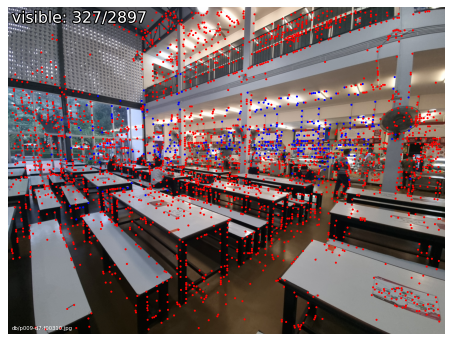

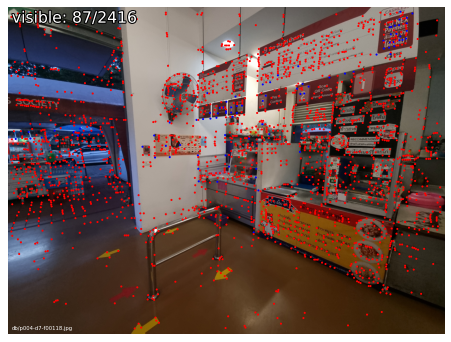

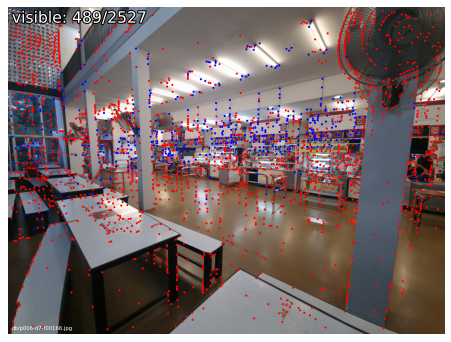

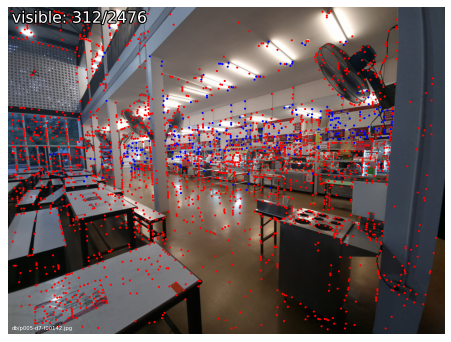

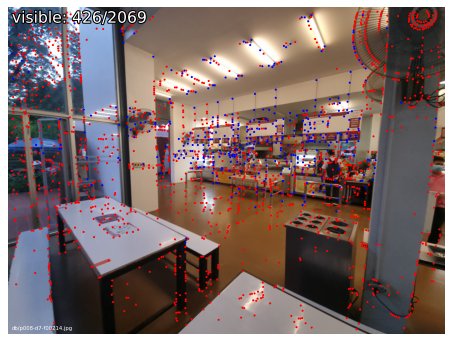

In [23]:
visualization.visualize_sfm_2d(model, images, color_by='visibility', n=5)

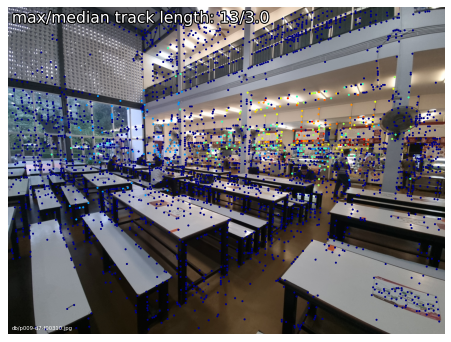

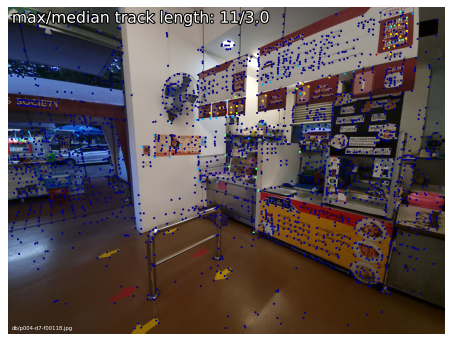

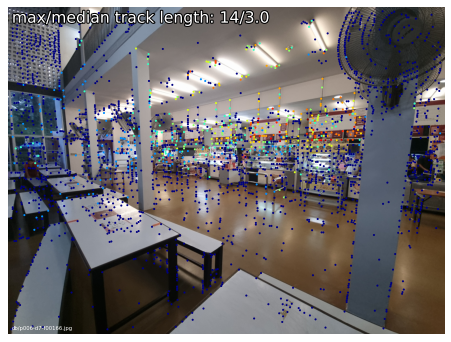

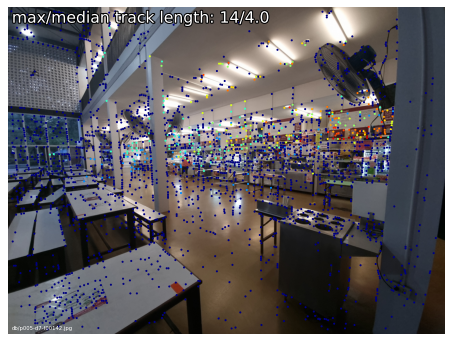

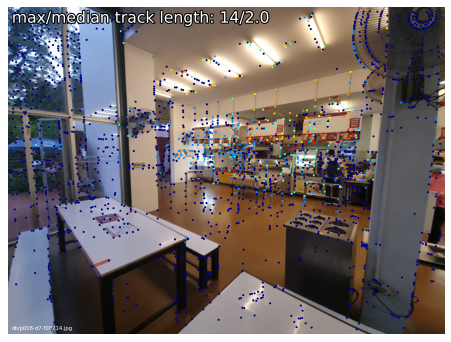

In [24]:
visualization.visualize_sfm_2d(model, images, color_by='track_length', n=5)

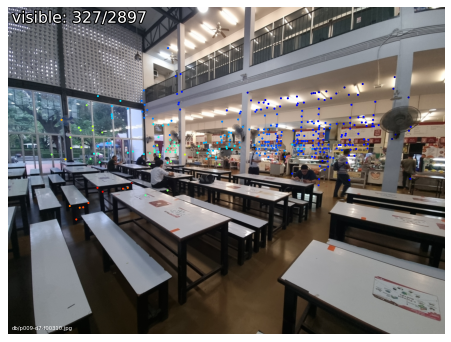

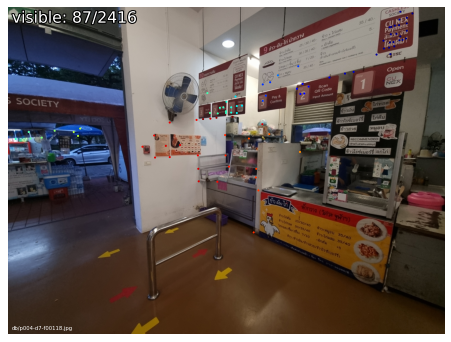

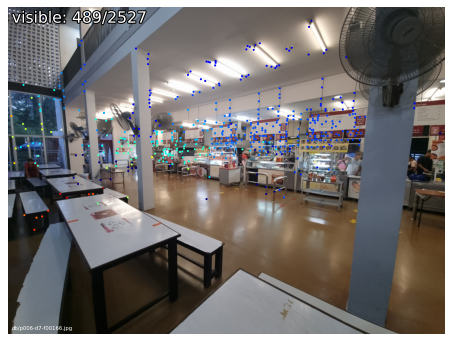

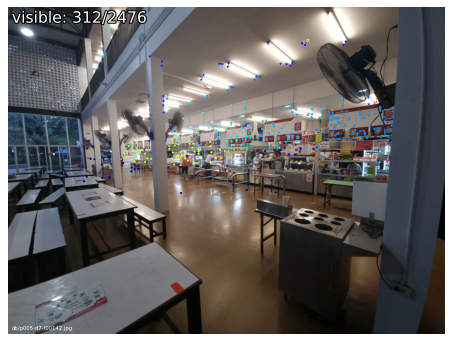

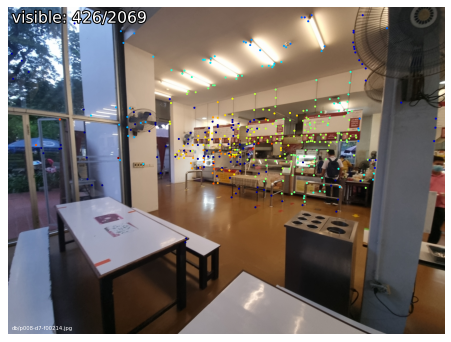

In [25]:
visualization.visualize_sfm_2d(model, images, color_by='depth', n=5)

In [ ]:
from hloc.visualization import plot_images, read_image
from hloc.utils import viz_3d

In [ ]:
fig = viz_3d.init_figure()
viz_3d.plot_reconstruction(fig, model, color='rgba(255,0,0,0.5)', name="mapping")
fig.show()

In [ ]:
visualization.visualize_sfm_2d(model, images, color_by='visibility', n=2)

## Localizelol

In [3]:
import pycolmap as pc
from hloc.visualization import plot_images, read_image
from hloc.utils import viz_3d

model = pc.Reconstruction()
model.read(str(sfm_dir))
print(model.summary())

Reconstruction:
	num_reg_images = 104
	num_cameras = 1
	num_points3D = 32725
	num_observations = 117932
	mean_track_length = 3.60373
	mean_observations_per_image = 1133.96
	mean_reprojection_error = 1.24264


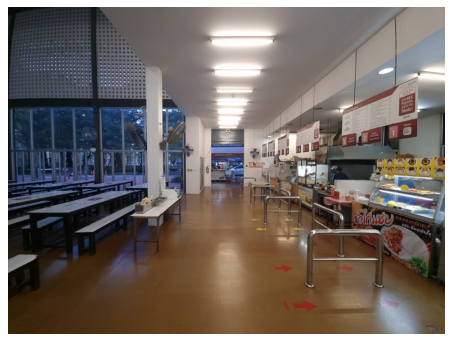

In [4]:
from pathlib import Path
query_path = Path("/src/matcher_engine/HierarchicalLocalization/datasets/canteen-20221115/images")
im_path = 'db/p002-d0-f00049.jpg'
full_im_path = query_path / im_path
plot_images([read_image(full_im_path)], dpi=75)

In [5]:
feature_conf

{'output': 'feats-superpoint-n4096-r1024',
 'model': {'name': 'superpoint', 'nms_radius': 3, 'max_keypoints': 4096},
 'preprocessing': {'grayscale': True, 'resize_max': 1024}}

In [6]:
images = Path('/src/matcher_engine/HierarchicalLocalization/datasets/canteen-20221115/images')

In [7]:
extract_features.main(feature_conf, images, image_list=[im_path], feature_path=feature_path, overwrite=True)

[2023/01/17 13:32:10.752Z hloc INFO] Extracting local features with configuration:
{'model': {'max_keypoints': 4096, 'name': 'superpoint', 'nms_radius': 3},
 'output': 'feats-superpoint-n4096-r1024',
 'preprocessing': {'grayscale': True, 'resize_max': 1024}}
[2023/01/17 13:32:10.755Z hloc INFO] Start delete query feature: outputs/canteen-20221115/feats-superpoint-n4096-r1024.h5
[2023/01/17 13:32:10.758Z hloc INFO] Start skip pairs: outputs/canteen-20221115/feats-superpoint-n4096-r1024.h5


Loaded SuperPoint model


[2023/01/17 13:32:12.869Z hloc INFO] Finished setup model for feature extraction
100%|██████████| 1/1 [00:00<00:00, 18.61it/s]
[2023/01/17 13:32:12.929Z hloc INFO] Finished exporting features.


PosixPath('outputs/canteen-20221115/feats-superpoint-n4096-r1024.h5')

In [8]:
loc_pairs = outputs / 'pairs-loc.txt'

In [9]:
loc_pairs

PosixPath('outputs/canteen-20221115/pairs-loc.txt')

In [179]:
references = [i[1].name for i in model.images.items()]
# pairs_from_exhaustive.main(loc_pairs, image_list=[im_path], ref_list=references)
pairs_from_retrieval.main(retrieval_path, loc_pairs, 10, query_list=[im_path], db_prefix="db")

references = [i.split(" ")[1] for i in open(loc_pairs, 'r').read().split("\n")]
references

[2023/01/17 14:29:05.334Z hloc INFO] Extracting image pairs from a retrieval database.
[2023/01/17 14:29:05.441Z hloc INFO] Found 10 pairs.


['db/p001-d0-f00025.jpg',
 'db/p000-d0-f00001.jpg',
 'db/p003-d0-f00073.jpg',
 'db/p007-d0-f00169.jpg',
 'db/p003-d4-f00085.jpg',
 'db/p002-d1-f00052.jpg',
 'db/p001-d1-f00028.jpg',
 'db/p004-d4-f00109.jpg',
 'db/p002-d7-f00070.jpg',
 'db/p002-d4-f00061.jpg']

In [180]:
loc_pairs

PosixPath('outputs/canteen-20221115/pairs-loc.txt')

In [181]:
def remove_image_from_pairs(db_im_names, inverse=False):
    fd = open(loc_pairs, 'r')
    txt = list(fd.read().split("\n"))
    fd.close()
    new_txt = []
    query_name = txt[0].split(" ")[0]
    for im_name in db_im_names:
        if inverse:
            new_txt.append(f"{query_name} {im_name}")        
        else: 
            txt = list(filter(lambda x: im_name not in x, txt))
    if inverse: txt = new_txt
    references = [i.split(" ")[1] for i in txt]
    file_to_write = '\n'.join(txt)
    print("writing...", file_to_write)
    fd = open(loc_pairs, "w", encoding="utf-8")
    fd.write(file_to_write)
    print("write success!")
    return references

# references = remove_image_from_pairs(["db/p010-d1-f00220.jpg",
# "db/p007-d2-f00175.jpg",
# "db/p010-d0-f00217.jpg",
# "db/p006-d1-f00148.jpg",
# "db/p009-d1-f00292.jpg",
# "db/p009-d0-f00289.jpg",
# "db/p010-d2-f00223.jpg",
# "db/p006-d2-f00151.jpg",
# "db/p006-d0-f00145.jpg",
# "db/p001-d2-f00031.jpg",
# "db/p007-d1-f00172.jpg",
# "db/p002-d2-f00055.jpg",
# "db/p007-d0-f00169.jpg",
# "db/p005-d1-f00124.jpg",
# "db/p000-d0-f00001.jpg",
# # "db/p005-d5-f00136.jpg", #bad

# references = remove_image_from_pairs([
# "db/p002-d0-f00049.jpg",
# "db/p002-d1-f00052.jpg",
# "db/p002-d7-f00070.jpg",
# "db/p001-d0-f00025.jpg", #Bad posse
# "db/p001-d1-f00028.jpg",
# # "db/p001-d7-f00046.jpg",
# # "db/p003-d0-f00073.jpg",
# # "db/p003-d1-f00076.jpg",
# # "db/p008-d0-f00193.jpg",
# # "db/p007-d7-f00190.jpg",
# # "db/p003-d7-f00094.jpg",
# # "db/p007-d0-f00169.jpg",
# # "db/p000-d1-f00004.jpg",
# # "db/p000-d7-f00022.jpg",
# # "db/p006-d0-f00145.jpg",
# # "db/p010-d0-f00217.jpg",
# # "db/p000-d0-f00001.jpg",
# # "db/p006-d7-f00166.jpg",
# # "db/p008-d7-f00214.jpg",
# # "db/p009-d0-f00289.jpg",
# # "db/p007-d1-f00172.jpg",
# ],  inverse=True)

In [182]:
' '.join(references)

'db/p001-d0-f00025.jpg db/p000-d0-f00001.jpg db/p003-d0-f00073.jpg db/p007-d0-f00169.jpg db/p003-d4-f00085.jpg db/p002-d1-f00052.jpg db/p001-d1-f00028.jpg db/p004-d4-f00109.jpg db/p002-d7-f00070.jpg db/p002-d4-f00061.jpg'

In [183]:
match_features.main(matcher_conf, loc_pairs, features=feature_path, matches=match_path, overwrite=True);

[2023/01/17 14:29:06.113Z hloc INFO] Matching local features with configuration:
{'model': {'name': 'superglue',
           'sinkhorn_iterations': 50,
           'weights': 'outdoor'},
 'output': 'matches-superglue'}
[2023/01/17 14:29:06.188Z hloc INFO] Start delete query matching: outputs/canteen-20221115/feats-superpoint-n4096-r1024_matches-superglue_pairs-custom_retrieved.h5
[2023/01/17 14:29:06.190Z hloc INFO] Start skip pairs: outputs/canteen-20221115/feats-superpoint-n4096-r1024_matches-superglue_pairs-custom_retrieved.h5
[2023/01/17 14:29:06.190Z hloc INFO] Finished setup model for matching
100%|██████████| 10/10 [00:01<00:00,  5.14it/s]
[2023/01/17 14:29:08.141Z hloc INFO] Finished exporting matches.


found 196/2667 inlier correspondences.
db/p002-d1-f00052.jpg
db/p002-d7-f00070.jpg
db/p007-d0-f00169.jpg
db/p001-d1-f00028.jpg
db/p001-d0-f00025.jpg
db/p003-d0-f00073.jpg
db/p000-d0-f00001.jpg
db/p003-d4-f00085.jpg
db/p004-d4-f00109.jpg
db/p002-d4-f00061.jpg


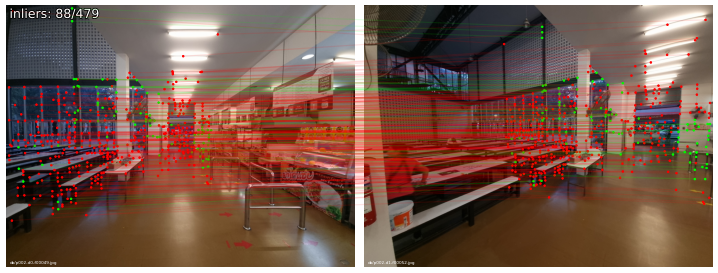

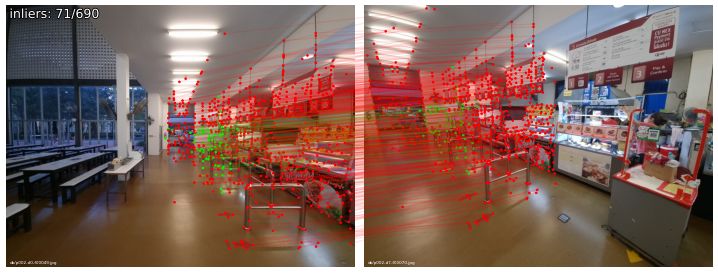

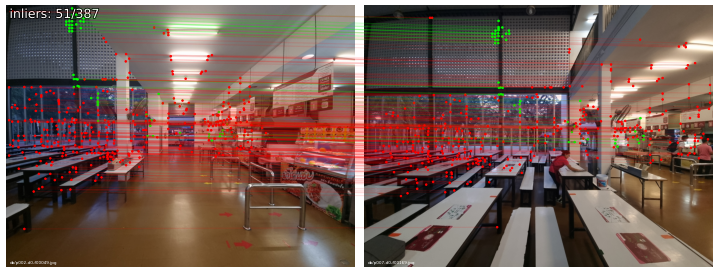

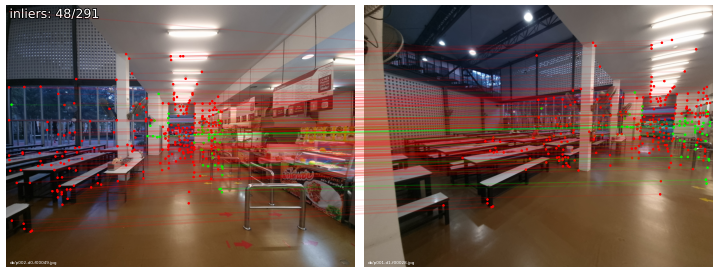

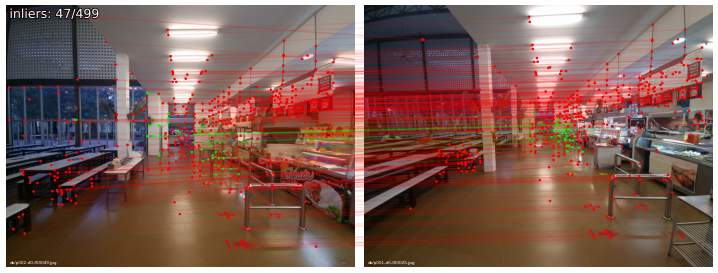

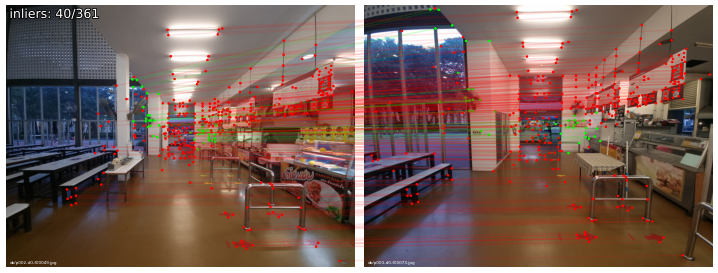

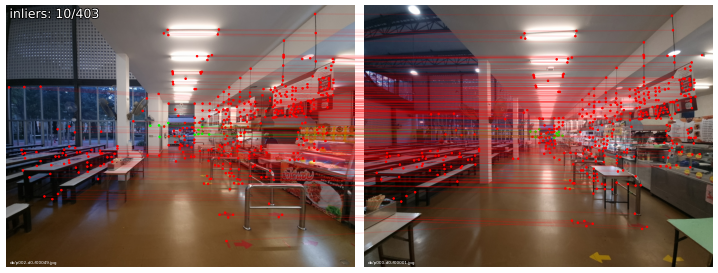

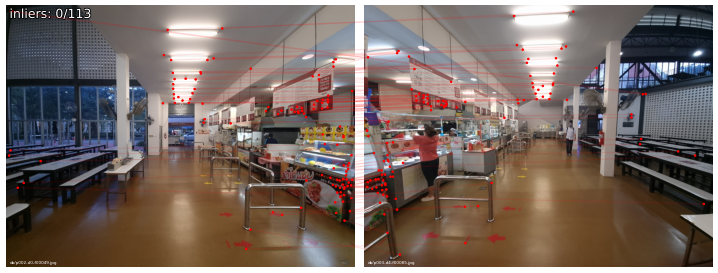

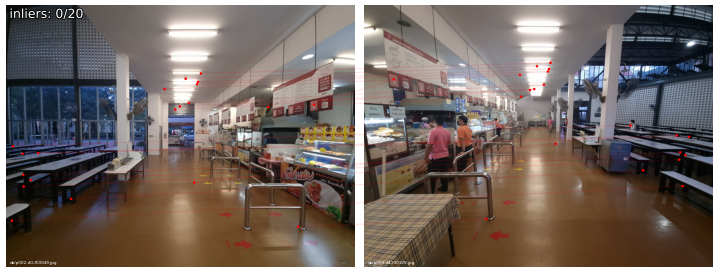

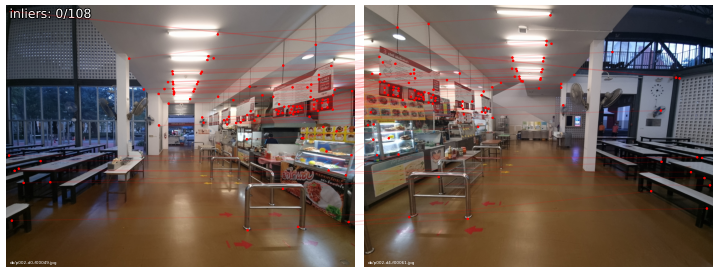

In [195]:
import pycolmap
from hloc.localize_sfm import QueryLocalizer, pose_from_cluster

camera = pycolmap.infer_camera_from_image(full_im_path)
ref_ids = [model.find_image_with_name(r).image_id for r in references]
conf = {
    'estimation': {'ransac': {'max_error': 5, 
                              'min_num_trials':1000, 
                              'max_num_trials':100000, 
                              # 'min_inlier_ratio':0.1, 
                              # 'confidence':0.1
                             }
                  },
    'refinement': {'refine_focal_length': True, 'refine_extra_params': True},
}
localizer = QueryLocalizer(model, conf)
ret, log = pose_from_cluster(localizer, im_path, camera, ref_ids, feature_path, match_path)

print(f'found {ret["num_inliers"]}/{len(ret["inliers"])} inlier correspondences.')
visualization.visualize_loc_from_log(images, im_path, log, model, top_k_db=10, dpi=60)

In [196]:
ret
# log

{'success': True,
 'qvec': array([ 0.19871535, -0.01271181,  0.97976052,  0.02049251]),
 'tvec': array([-2.12976215, -0.00480448,  0.59338854]),
 'num_inliers': 196,
 'inliers': [False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  Fa

In [85]:
pose = pycolmap.Image(tvec=ret['tvec'], qvec=ret['qvec'])
viz_3d.plot_camera_colmap(fig, pose, camera, color='rgba(0,255,0,0.5)', name=im_path)
fig.show()

NameError: name 'fig' is not defined

In [198]:
im_path

'db/p002-d0-f00049.jpg'

In [ ]:
pose

In [ ]:
image_obj = model.find_image_with_name(im_path)
print(image_obj)
print(image_obj.tvec, image_obj.qvec)


In [ ]:
ret

In [ ]:
ret

In [ ]:
model